In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pyrenn as prn
from  sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import random

In [2]:
# pl_A = np.arange(10,110,10)
np.random.seed(100)
pl_A = np.random.uniform(10,110,size = 10)
k_hl = np.random.uniform(10,110,size = 10)

In [3]:
pl_A

array([64.34049418, 37.83693851, 52.45175907, 94.47761323, 10.47188562,
       22.15691208, 77.07490847, 92.58527551, 23.67065897, 67.50933294])

In [2]:
def convection_heat_transfer(k_hl,pl_A,x):
   return (np.cosh(np.sqrt(pl_A/k_hl)*(1-x))+ np.sqrt(1/(k_hl*pl_A))*np.sinh(np.sqrt(pl_A/k_hl)*(1-x)))/(np.cosh(np.sqrt(pl_A/k_hl))+np.sqrt(1/(k_hl*pl_A))*np.sinh(np.sqrt(pl_A/k_hl)))

In [4]:
x = np.arange(0,1.01,0.01).reshape(-1,1) 
y_pred = convection_heat_transfer(40,20,x)
plt.plot(x,y_pred)

In [10]:
df_T = pd.DataFrame(data=np.random.randn(1,1))
df_T.columns = ["Temp"]
df_val = pd.DataFrame(data=np.random.randn(1,3),columns=["k_hl","pl_A","dis"])
df_T.drop([0],inplace=True)
df_val.drop([0],inplace=True)

In [6]:
df_T

,Temp


In [7]:
df_val

,k_hl,pl_A,dis


In [15]:
count = 0
for i in k_hl:
    for j in pl_A:
        for dis in range(10):
            np.random.seed(100)
            k = random.uniform(0,1)
            temp = convection_heat_transfer(i,j,k)
            df_T.loc[count] = temp
            df_val.loc[count] = [i,j,k]
            count = count + 1

In [16]:
df_T

,Temp
0,0.839862
1,0.761789
2,0.770936
3,0.889646
4,0.901623
...,...
995,0.938047
996,0.486465
997,0.864129
998,0.516087


In [17]:
df_val

,k_hl,pl_A,dis
0,99.132195,64.340494,0.373034
1,99.132195,64.340494,0.705824
2,99.132195,64.340494,0.650008
3,99.132195,64.340494,0.234876
4,99.132195,64.340494,0.205516
...,...,...,...
995,37.407375,67.509333,0.054829
996,37.407375,67.509333,0.894767
997,37.407375,67.509333,0.127084
998,37.407375,67.509333,0.728822


In [18]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    1000 non-null   float64
dtypes: float64(1)
memory usage: 47.9 KB


In [19]:
Xtrain,Xtest,ytrain,ytest = train_test_split(df_val.values,df_T.values,train_size=0.7,random_state=111)

In [20]:
Xtrain= Xtrain.T
ytrain= ytrain.T
Xtest = Xtest.T
ytest = ytest.T

In [21]:
Xtrain.shape

(3, 700)

In [22]:
net = prn.CreateNN([3,3,1])
iter =200 
prn.train_LM(Xtrain, ytrain, net,verbose=True,k_max=iter,E_stop=1e-5)

Iteration:  0 		Error:  91.04919735129086 	scale factor:  3.0
Iteration:  1 		Error:  17.849932329851217 	scale factor:  0.3
Iteration:  2 		Error:  10.93292192035547 	scale factor:  0.03
Iteration:  3 		Error:  5.633848902713706 	scale factor:  0.03
Iteration:  4 		Error:  1.5215881500998296 	scale factor:  0.03
Iteration:  5 		Error:  0.6868692505198177 	scale factor:  0.03
Iteration:  6 		Error:  0.33988964677011047 	scale factor:  0.3
Iteration:  7 		Error:  0.3139834414299408 	scale factor:  0.3
Iteration:  8 		Error:  0.29415188065697145 	scale factor:  0.3
Iteration:  9 		Error:  0.2887328368287003 	scale factor:  0.03
Iteration:  10 		Error:  0.20216483941038915 	scale factor:  0.03
Iteration:  11 		Error:  0.1904632176950476 	scale factor:  0.03
Iteration:  12 		Error:  0.18561698849120792 	scale factor:  0.03
Iteration:  13 		Error:  0.1824471914285756 	scale factor:  0.03
Iteration:  14 		Error:  0.18001727821923746 	scale factor:  0.03
Iteration:  15 		Error:  0.17802228951

Iteration:  110 		Error:  0.1311098300990831 	scale factor:  0.00030000000000000003
Iteration:  111 		Error:  0.13105857610341284 	scale factor:  3.0000000000000004e-05
Iteration:  112 		Error:  0.13104094672273212 	scale factor:  3.0000000000000004e-05
Iteration:  113 		Error:  0.13101755706899681 	scale factor:  3.0000000000000004e-05
Iteration:  114 		Error:  0.1309859149831069 	scale factor:  0.00030000000000000003
Iteration:  115 		Error:  0.1309400305166903 	scale factor:  3.0000000000000004e-05
Iteration:  116 		Error:  0.13092345696494198 	scale factor:  3.0000000000000004e-05
Iteration:  117 		Error:  0.1309017282751703 	scale factor:  3.0000000000000004e-05
Iteration:  118 		Error:  0.13087549684216612 	scale factor:  0.00030000000000000003
Iteration:  119 		Error:  0.13083672205024957 	scale factor:  3.0000000000000004e-05
Iteration:  120 		Error:  0.13081799848987935 	scale factor:  3.0000000000000004e-05
Iteration:  121 		Error:  0.1307951977000514 	scale factor:  3.000000

{'delay': {'In': [0], 'Intern': [], 'Out': []},
 'nn': [3, 3, 1],
 'M': 2,
 'layers': [3, 1],
 'dmax': 0,
 'U': [2],
 'X': [1],
 'dL': {(1, 1): [], (1, 2): [], (2, 1): [0], (2, 2): []},
 'dI': {(1, 1): [0]},
 'L_b': {1: [2], 2: []},
 'L_f': {1: [], 2: [1]},
 'I': {1: [1]},
 'CX_LW': {2: []},
 'CU_LW': {1: [], 2: []},
 'w0': array([ 0.04340494,  0.34477613,  0.17074908, -0.22163061, -0.49528114,
         0.32585276, -0.07548241, -0.37843088, -0.36329341,  0.07509333,
         0.39132195, -0.29079788, -0.31467178, -0.39162311, -0.28030251,
         0.47862378]),
 'w': array([ 5.05787356e-01,  8.23786521e-01,  4.93114792e-01, -3.33921672e-01,
         1.54162528e-02,  4.19751340e-01,  1.08939585e+00, -1.15678940e-01,
        -1.69606072e-01,  2.26274154e+00,  2.01505300e+00,  1.92257662e+00,
        -2.45730829e+01,  3.93618624e+01, -2.86191987e+01,  1.45231467e+01]),
 'N': 16,
 'normP': array([107.86237847,  94.47761323,   1.        ]),
 'normY': array([1.]),
 'ErrorHistory': array([91.0

Text(0.5, 1.0, 'Training Error')

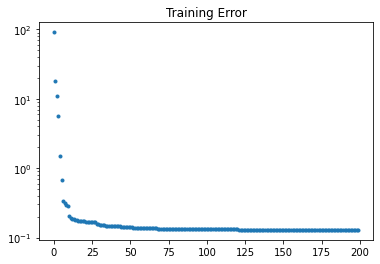

In [23]:
plt.plot(range(iter),net['ErrorHistory'],'.')
plt.yscale('log')
plt.title("Training Error")

In [24]:
y_pred = prn.NNOut(Xtest,net)

In [25]:
y_pred

array([0.45546689, 0.68179787, 0.49637341, 0.83463979, 0.91817112,
       0.86821608, 0.88386389, 0.95315673, 0.57288836, 0.60909973,
       0.59327683, 0.99731931, 0.40849329, 0.79904626, 0.94490696,
       0.89818653, 0.8980188 , 0.63664788, 0.99404224, 0.94428528,
       0.39499755, 0.98144557, 0.90532444, 0.29710679, 0.89820944,
       0.65477484, 0.82805506, 0.42243251, 0.8086393 , 0.74287463,
       0.45525335, 0.87123926, 0.68767796, 0.31755512, 0.81638945,
       0.58147091, 0.59905188, 0.72061969, 0.68407276, 0.6466262 ,
       0.9332717 , 0.72252442, 0.60128961, 0.89759504, 0.95092048,
       0.55806447, 0.8898154 , 0.66188177, 0.89600885, 0.97876877,
       0.37345838, 0.40288335, 0.58178529, 0.49847374, 0.18119028,
       0.8947863 , 0.72359593, 0.88362426, 0.89378119, 0.9455119 ,
       0.91626258, 0.77158411, 0.96350613, 0.94850013, 0.81135837,
       0.89427583, 0.69205351, 0.7277452 , 0.61281213, 0.90395975,
       0.92744017, 0.79724941, 0.4364483 , 0.8870622 , 0.51191

In [26]:
ytest

array([[0.45334343, 0.6930145 , 0.49025241, 0.83209832, 0.92698191,
        0.89052937, 0.89561451, 0.93704622, 0.57403703, 0.60853421,
        0.5673563 , 0.97216919, 0.40841634, 0.82694271, 0.94092887,
        0.8993468 , 0.89225551, 0.63281948, 0.99007885, 0.93373026,
        0.39720105, 0.96666473, 0.90957659, 0.29530978, 0.89900923,
        0.66335543, 0.82269569, 0.41425315, 0.81471028, 0.74026162,
        0.44559049, 0.88063208, 0.6888526 , 0.35013315, 0.82958351,
        0.57366643, 0.5898705 , 0.72703522, 0.66587279, 0.6401607 ,
        0.94524544, 0.71466654, 0.59282156, 0.89363323, 0.94894981,
        0.54606493, 0.88980597, 0.67094277, 0.89887996, 0.95589795,
        0.35581661, 0.41169449, 0.56995529, 0.49304154, 0.23039804,
        0.88170128, 0.7201888 , 0.87766712, 0.89563313, 0.97138011,
        0.93184076, 0.77818361, 0.97760091, 0.94188533, 0.81928186,
        0.90183821, 0.70188126, 0.72256392, 0.5998562 , 0.90914899,
        0.93019085, 0.80510626, 0.4119975 , 0.88

In [27]:
mean_squared_error(ytest,y_pred.reshape(1,-1),squared=False)

0.010091394584302138

In [28]:
from sklearn.metrics import  mean_absolute_percentage_error as MAPE

In [29]:
MAPE(y_pred.reshape(1,-1),ytest)

0.016455276171632154

# Inverse Model

In [62]:
def prior_theta(theta):
    x = np.array(theta).reshape(-1,1)
    mean = np.array([40,47]).reshape(-1,1)
    covariance =np.array([[1,0],[0,1]]).reshape(-1,2)
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [31]:
prior_theta([31,47])

array([[4.10103631e-19]])

In [130]:
def model_pred(theta,x):
    k_hl = theta[0]
    pl_A = theta[1]
    pred = []
    for i in x:
        pred.append(prn.NNOut(np.array([k_hl,pl_A,i]).reshape(-1,1),net))
    return np.array(pred).reshape(-1,1)

In [160]:
np.random.seed(100)
def new_theta(theta):
    covariance =np.array([[0.5,0],[0,0]]).reshape(-1,2)
    return np.random.multivariate_normal(np.array(theta).reshape(-1),covariance)

In [132]:
np.random.seed(100)
sur_dis = np.random.uniform(0,1,size=10)
sur_dis

array([0.54340494, 0.27836939, 0.42451759, 0.84477613, 0.00471886,
       0.12156912, 0.67074908, 0.82585276, 0.13670659, 0.57509333])

In [133]:
true_k_hl = 30
true_pl_A = 47
true_temp = model_pred([true_k_hl,true_pl_A],sur_dis)
true_temp = np.array(true_temp)
true_temp

array([[0.61509702],
       [0.74330243],
       [0.66312765],
       [0.54068261],
       [0.98529522],
       [0.86407262],
       [0.57670036],
       [0.54384033],
       [0.85050972],
       [0.60440846]])

In [134]:
def likelihood(pred_temp):
    var = 0.002
    diff = (pred_temp - true_temp)**2
    diff = np.sum(diff)
    diff = np.exp(-0.5*diff/var)
    diff = diff/np.sqrt(2*np.pi*var)
    return diff

In [135]:
init_guess = [40,47]
model_pred(init_guess,sur_dis)

array([[0.67378941],
       [0.78754758],
       [0.7161501 ],
       [0.60973883],
       [1.00524269],
       [0.89592372],
       [0.64035639],
       [0.61237239],
       [0.88372026],
       [0.66443209]])

In [136]:
true_temp

array([[0.61509702],
       [0.74330243],
       [0.66312765],
       [0.54068261],
       [0.98529522],
       [0.86407262],
       [0.57670036],
       [0.54384033],
       [0.85050972],
       [0.60440846]])

#  Metropolis Hasting MCMC

In [208]:
init_guess = [50,47]
np.random.seed(100)
for i in range(1000):
    print(init_guess)
    orig_pred = model_pred(init_guess,sur_dis)
    orig_likelihood = likelihood(orig_pred) #*prior_theta(init_guess)
    theta_new = new_theta(init_guess)
    new_pred = model_pred(theta_new,sur_dis)
    new_likelihood = likelihood(new_pred) #*prior_theta(theta_new)
    if((new_likelihood>orig_likelihood) or (np.random.uniform(0,1)<(new_likelihood/orig_likelihood))):
        init_guess = theta_new

[50, 47]
[51.91403188 47.        ]
[51.91403188 47.        ]
[51.91403188 47.        ]
[52.07977299 47.        ]
[52.07977299 47.        ]
[51.96087658 47.        ]
[51.96087658 47.        ]
[52.09578854 47.        ]
[51.90269923 47.        ]
[51.90876836 47.        ]
[51.90876836 47.        ]
[51.62772049 47.        ]
[51.934132 47.      ]
[52.0521514 47.       ]
[52.0521514 47.       ]
[51.70064577 47.        ]
[51.03355671 47.        ]
[50.9509855 47.       ]
[51.11936669 47.        ]
[51.39708011 47.        ]
[50.59335101 47.        ]
[50.59335101 47.        ]
[48.67624894 47.        ]
[47.67483933 47.        ]
[47.67483933 47.        ]
[47.02014737 47.        ]
[46.21841756 47.        ]
[46.21841756 47.        ]
[46.29140102 47.        ]
[46.26936723 47.        ]
[45.55859274 47.        ]
[45.69090976 47.        ]
[45.43373249 47.        ]
[45.43373249 47.        ]
[44.69354758 47.        ]
[43.65585846 47.        ]
[43.54092905 47.        ]
[43.54092905 47.        ]
[43.54092905 

[27.37729614 47.        ]
[28.28813329 47.        ]
[28.28813329 47.        ]
[28.84160902 47.        ]
[28.86117877 47.        ]
[28.89382816 47.        ]
[29.30568515 47.        ]
[30.02047648 47.        ]
[29.85729136 47.        ]
[30.06750006 47.        ]
[29.80407912 47.        ]
[29.80077477 47.        ]
[30.15995242 47.        ]
[30.27442713 47.        ]
[30.68720394 47.        ]
[30.43234688 47.        ]
[30.23981847 47.        ]
[31.15023761 47.        ]
[31.63334092 47.        ]
[32.24335224 47.        ]
[32.24335224 47.        ]
[32.00443226 47.        ]
[31.9524492 47.       ]
[31.97070444 47.        ]
[31.53847316 47.        ]
[31.44976467 47.        ]
[31.95566507 47.        ]
[30.6234847 47.       ]
[30.92877712 47.        ]
[32.15776353 47.        ]
[32.78232137 47.        ]
[32.78232137 47.        ]
[32.14925968 47.        ]
[31.37604095 47.        ]
[31.58267777 47.        ]
[31.44359897 47.        ]
[31.98101367 47.        ]
[30.84998634 47.        ]
[30.63682955 47.

[34.16145905 47.        ]
[35.53271615 47.        ]
[35.6114182 47.       ]
[33.76989496 47.        ]
[33.63354785 47.        ]
[33.34398594 47.        ]
[33.84681861 47.        ]
[33.90248713 47.        ]
[33.90248713 47.        ]
[31.95448687 47.        ]
[31.0973426 47.       ]
[31.34641013 47.        ]
[29.98072688 47.        ]
[30.22924298 47.        ]
[30.63190049 47.        ]
[31.15858318 47.        ]
[31.00111007 47.        ]
[29.86970005 47.        ]
[31.08027892 47.        ]
[31.46299888 47.        ]
[32.24440497 47.        ]
[31.27672447 47.        ]
[31.18286304 47.        ]
[31.18286304 47.        ]
[31.96250031 47.        ]
[31.6445078 47.       ]
[32.3320373 47.       ]
[31.90428258 47.        ]
[31.21397004 47.        ]
[31.3416358 47.       ]
[31.34496293 47.        ]
[31.06087696 47.        ]
[32.02557412 47.        ]
[33.15933856 47.        ]
[32.63974307 47.        ]
[31.95857313 47.        ]
[31.8466339 47.       ]
[30.76337214 47.        ]
[30.24304738 47.        

[32.63236015 47.        ]
[33.53268831 47.        ]
[33.53268831 47.        ]
[33.16179866 47.        ]
[33.25464639 47.        ]
[32.35195618 47.        ]
[32.26689342 47.        ]
[31.9878219 47.       ]
[31.81033819 47.        ]
[32.67467108 47.        ]
[32.67467108 47.        ]
[33.3532158 47.       ]
[33.3532158 47.       ]
[33.3532158 47.       ]
[33.95784185 47.        ]
[33.77992281 47.        ]
[33.61484236 47.        ]
[33.40730147 47.        ]
[33.79917876 47.        ]
[33.58975309 47.        ]
[33.58225767 47.        ]
[34.5521049 47.       ]
[35.35885891 47.        ]
[35.28556774 47.        ]
[35.28556774 47.        ]
[35.4791874 47.       ]
[35.49965417 47.        ]
[35.49965417 47.        ]
[35.12981335 47.        ]
[35.12981335 47.        ]
[35.62892282 47.        ]
[35.71975388 47.        ]
[35.46675911 47.        ]
[35.46675911 47.        ]
[35.21708413 47.        ]
[35.49004028 47.        ]
[34.05397433 47.        ]
[34.06213336 47.        ]
[34.55190545 47.        

In [91]:
# init_guess = [40,47]
# new_pred = model_pred(init_guess,sur_dis)
# new_likelihood = likelihood(theta_new) #*prior_theta(theta_new)

In [209]:
init_guess

array([33.96457816, 47.        ])

In [210]:
y1_pred = model_pred(init_guess,sur_dis)
y1_pred

array([[0.63997608],
       [0.76223948],
       [0.6856711 ],
       [0.5698518 ],
       [0.99428118],
       [0.87792935],
       [0.60362983],
       [0.5727916 ],
       [0.86492317],
       [0.62983683]])

In [211]:
true_temp

array([[0.61509702],
       [0.74330243],
       [0.66312765],
       [0.54068261],
       [0.98529522],
       [0.86407262],
       [0.57670036],
       [0.54384033],
       [0.85050972],
       [0.60440846]])

In [212]:
MAPE(true_temp,y1_pred)

0.03379743303432248

In [59]:
k_hl_guess = np.array([10,20,30,40,50,60,70,80])

In [42]:
k_hl_guess[0]

10

In [60]:
# def lkhood_est(x):
#     lis = []
#     for i in x:
# #         print(model_pred([i,47],sur_dis))
#         lis.append(likelihood(model_pred([i,47],sur_dis)))
#     return lis

In [61]:
lkhood_est(k_hl_guess)

[8.758092879727691e-241,
 3.5090086367259355e-47,
 28.209479177387813,
 1.6338450589064722e-29,
 1.5176209983326216e-95,
 5.791606723496047e-172,
 1.6726734469138287e-244,
 4.9054411293832595e-306]